We should make these heatmaps from the Omicron files match so that they are easier to compare with each other.

In [31]:
import pandas as pd

esm_rbd = pd.read_csv("rbd_o/RBD.O.from-esm-mlm.CLS-embedded.tSNE-perplexity1600.lineage_clusters.csv")
esm = pd.read_csv("rbd_o/RBD.O.CLS-embedded.tSNE-perplexity1600.lineage_clusters.csv")
msa = pd.read_csv("rbd_o_msa/RBD.O.MSA.tSNE-perplexity1600.lineage_clusters.csv")
print(len(esm_rbd["Pango lineage"].unique()), len(esm["Pango lineage"].unique()), len(msa["Pango lineage"].unique()))

91 88 34


In [32]:
required_lineages = list(set(
    list(esm_rbd["Pango lineage"].unique()) +
    list(esm["Pango lineage"].unique()) +
    list(msa["Pango lineage"].unique())
))
print(len(required_lineages))

96


In [33]:
def add_missing_lineages(df, required_lineages):
    # Get existing lineages in DataFrame
    existing_lineages = df["Pango lineage"].unique()
    
    # Find missing lineages
    missing_lineages = [l for l in required_lineages if l not in existing_lineages]
    
    if missing_lineages:
        # Create an empty DataFrame for missing lineages with columns matching df's columns except "Pango lineage"
        zero_data = {col: 0 for col in df.columns if col != "Pango lineage"}
        add_df = pd.DataFrame([{**{"Pango lineage": lineage}, **zero_data} for lineage in missing_lineages])

        # Append to original df
        df = pd.concat([df, add_df], ignore_index=True)
    
    return df

esm_rbd_filled = add_missing_lineages(esm_rbd, required_lineages)
esm_filled = add_missing_lineages(esm, required_lineages)
msa_filled = add_missing_lineages(msa, required_lineages)
print(len(esm_rbd_filled["Pango lineage"].unique()), len(esm_filled["Pango lineage"].unique()), len(msa_filled["Pango lineage"].unique()))

96 96 96


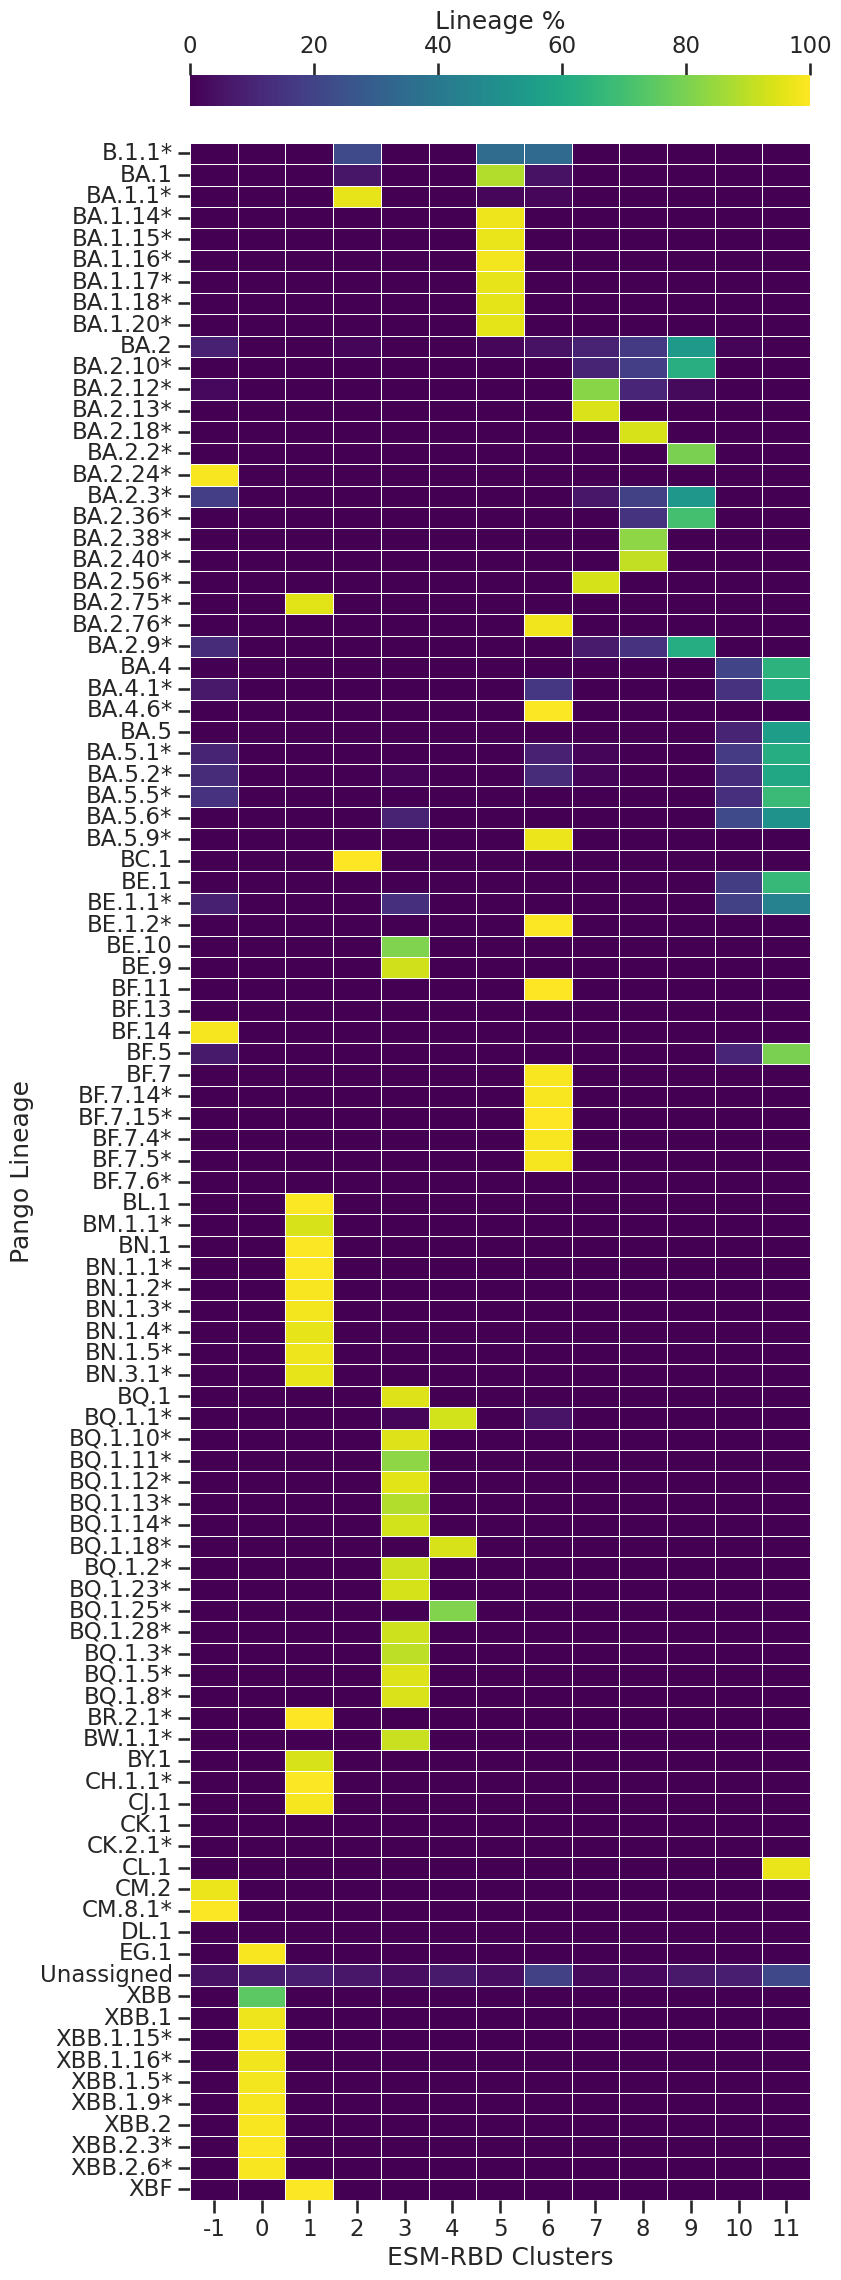

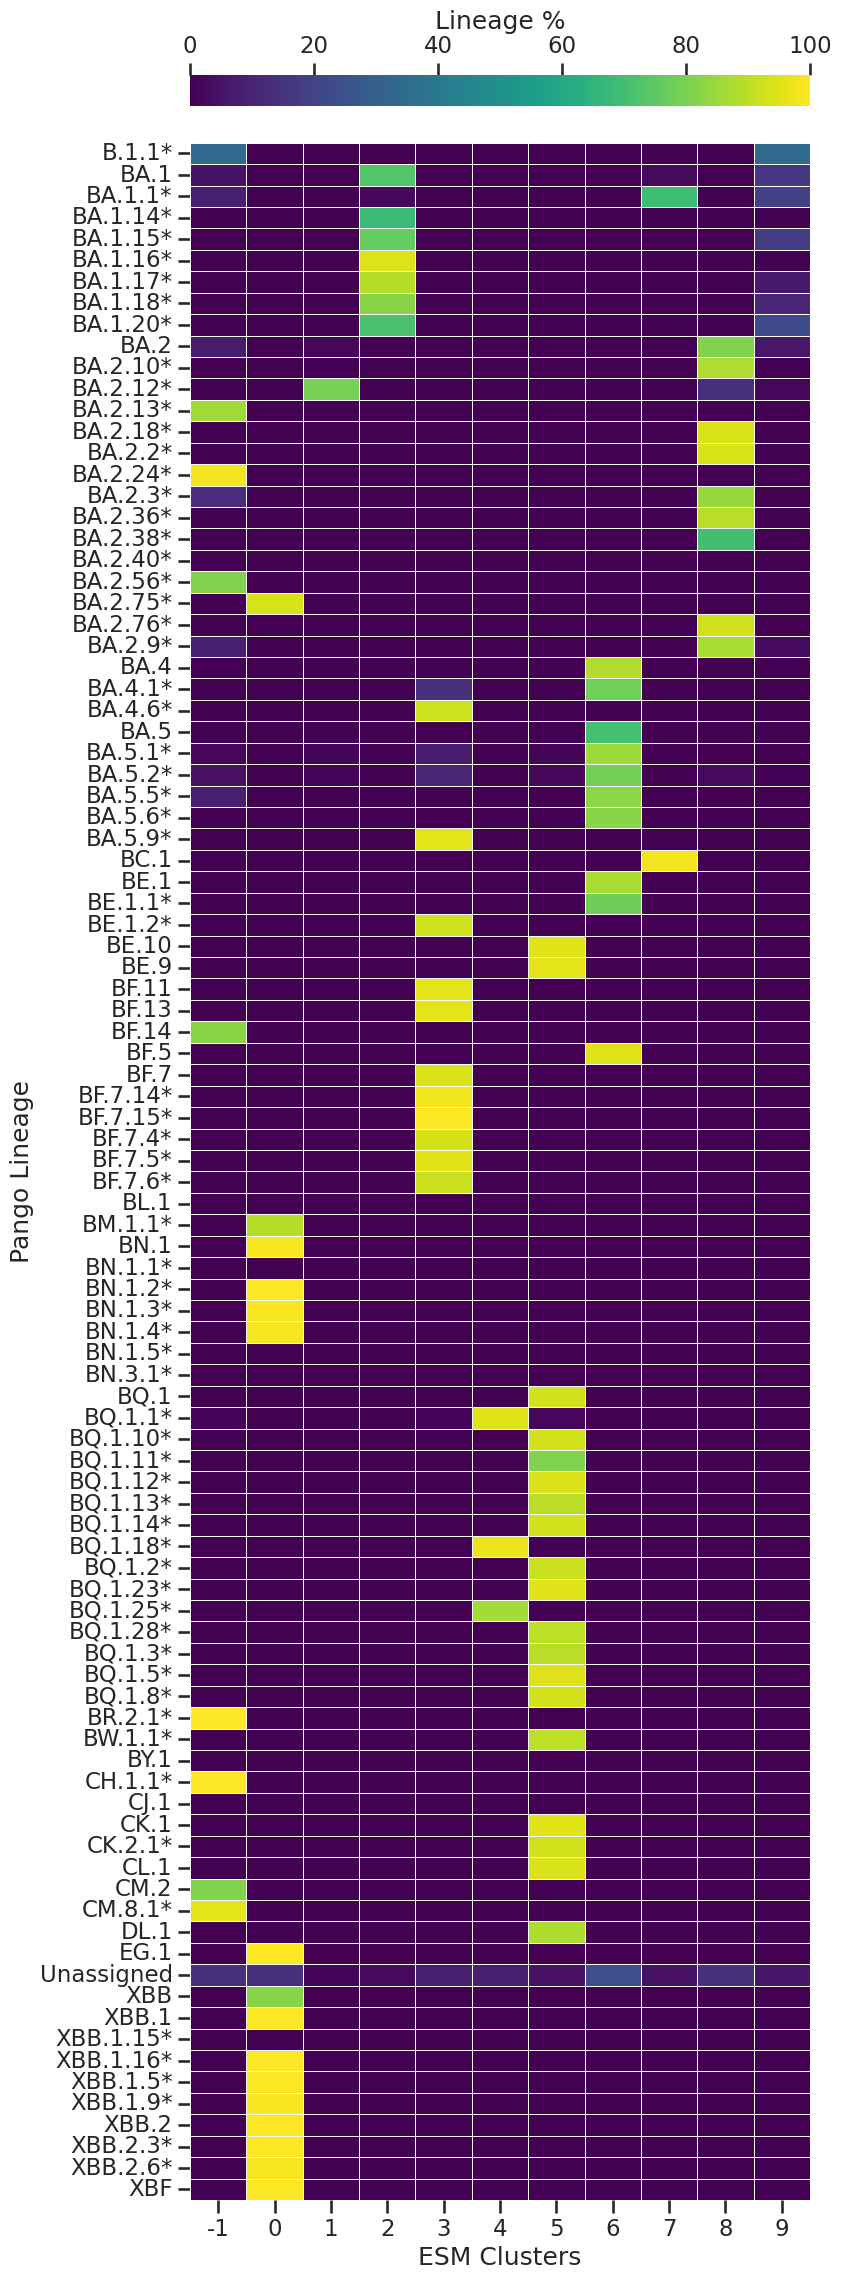

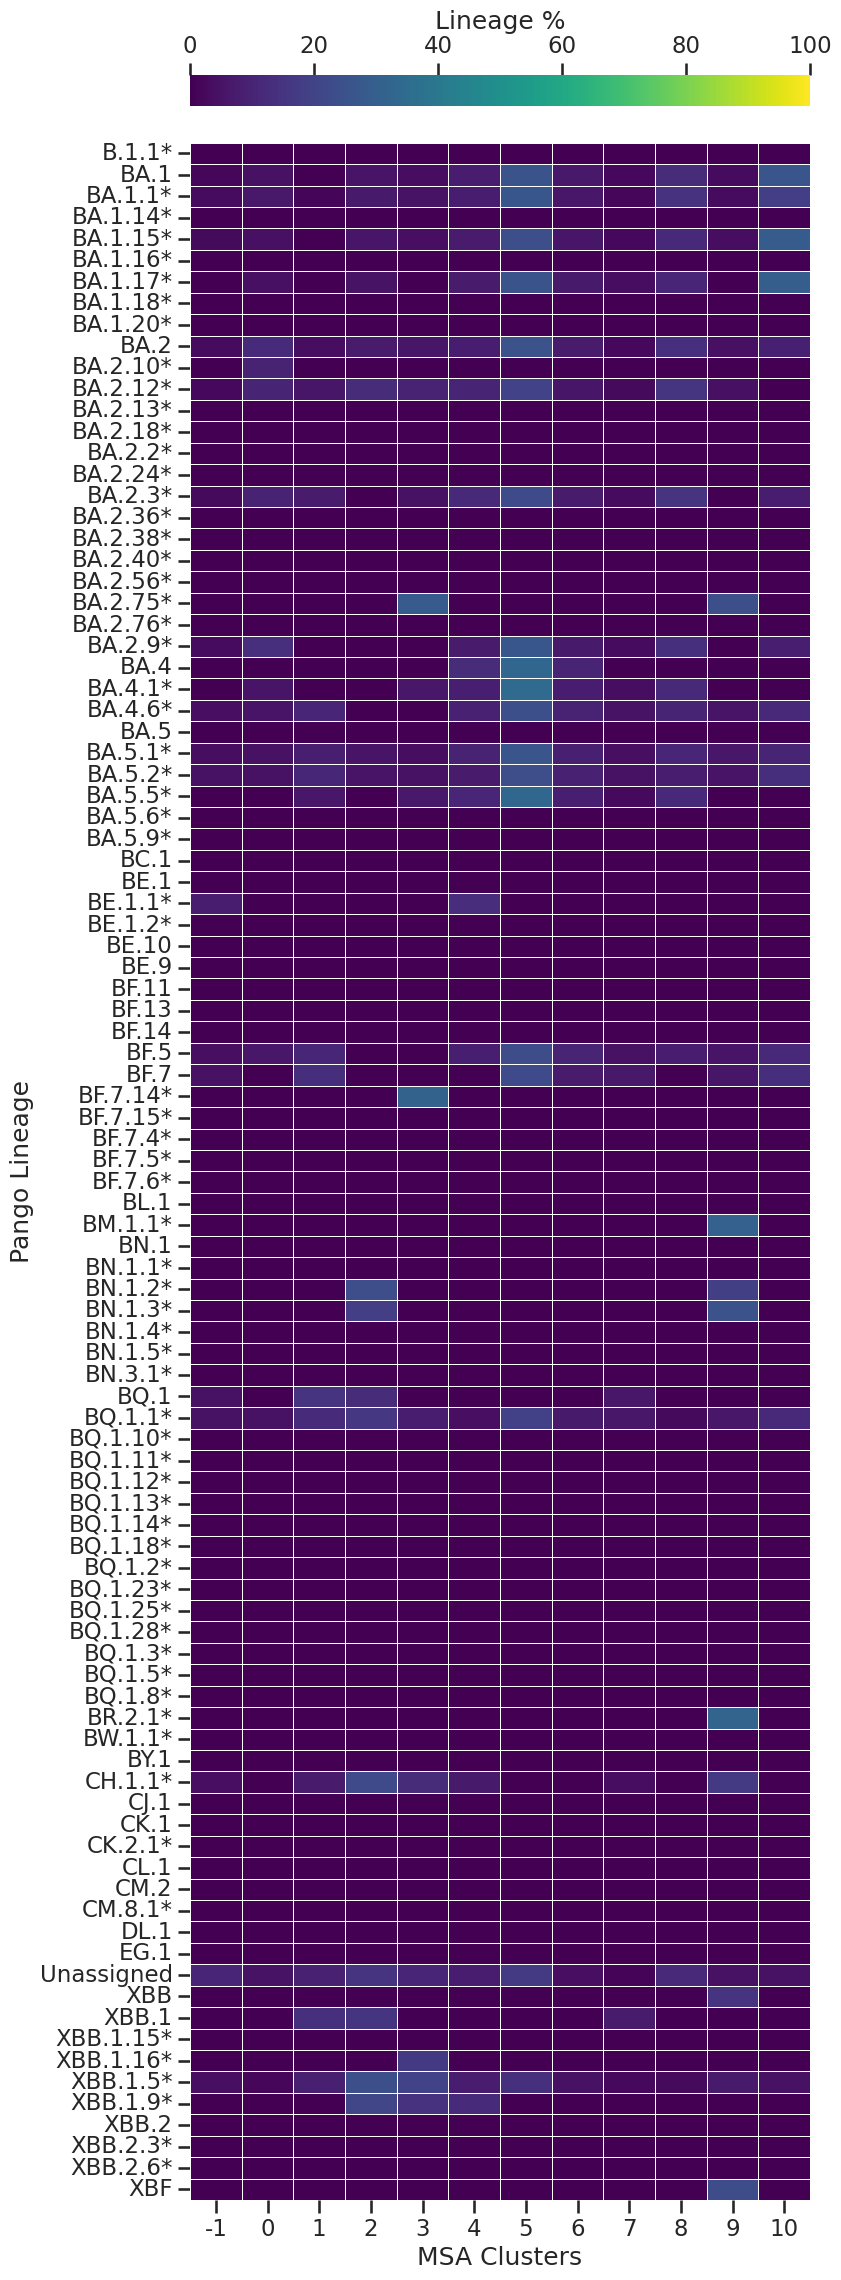

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

def make_heatmap(df, method, save_as):

    df = df.copy()

    # Pivot matrices
    heatmap_matrix = df.pivot(index='Pango lineage', columns='Cluster', values='Lineage %').fillna(0)     # cluster as x axis

    # Plot heatmaps
    sns.set_style('ticks')
    sns.set_context("talk")
    fig, ax = plt.subplots(figsize=(8, 32))

    ax = sns.heatmap(
        heatmap_matrix, annot=False, linewidth=.5, cmap="viridis", vmin=0, vmax=100, xticklabels=True, yticklabels=True,
        cbar_kws={"orientation": "horizontal", "aspect": 20, "pad": 0.015, "location":"top", "label": "Lineage %"}
    )

    # Move colorbar to the top
    plt.xlabel(f"{method} Clusters")
    plt.ylabel("Pango Lineage")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    # Save
    perp = 1600
    save_as = f"heatmaps/RBD.O.{save_as}.tSNE-perplexity{perp}.lineage_perc_heatmap_vertical"
    plt.savefig(f"{save_as}.pdf", format="pdf", dpi=300, bbox_inches='tight')
    plt.show()

make_heatmap(esm_rbd_filled, "ESM-RBD", "from-esm-mlm.CLS-embedded")
make_heatmap(esm_filled, "ESM", "CLS-embedded")
make_heatmap(msa_filled, "MSA", "MSA")